## Installation

In [ ]:
library(devtools)
install_github("yayuzh05/EGRNR")

## Usage
### Perform the algorithm on a single-cell dataset

In [1]:
options(warn = -1)
library(EGRNR)
data <- read.csv("./inst/test.csv", header = TRUE, row.names = 1, sep= " ", stringsAsFactor=TRUE)
head(data)

,pseudocell.gene_exprvalue,ca.distal.chr9_56613589_56613966,ca.distal.chr9_56620241_56621436,ca.distal.chr9_56635300_56637926,ca.distal.chr9_56638312_56639050,ca.distal.chr9_56646129_56647795,ca.distal.chr9_56656433_56657464,ca.distal.chr9_56657543_56658673,ca.distal.chr9_56662747_56663535,ca.distal.chr9_56669169_56670489,⋯,ca.distal.chr9_56753379_56754071,ca.distal.chr9_56797596_56798262,ca.distal.chr9_56869322_56870233,ca.distal.chr9_56884030_56884881,ca.distal.chr9_56895806_56896374,ca.distal.chr9_56981022_56982706,ca.distal.chr9_57031187_57032325,ca.prom.chr9_56795124_56797278,ctlCg.prom.chr9_56795364_56795527,ctlCg.prom.chr9_56795610_56797132
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
0,2.0-6.0,0-0.2,0-0.2,0.2-0.8,0-0.2,0.2-0.8,0.2-0.8,0.2-0.8,0-0.2,0-0.2,⋯,0-0.2,0-0.2,0-0.2,0-0.2,0-0.2,0.2-0.8,0.2-0.8,0.2-0.8,0-0.2,0-0.2
1,>=6.0,0-0.2,0.2-0.8,0.2-0.8,0-0.2,0.2-0.8,0.2-0.8,0.2-0.8,0.2-0.8,0-0.2,⋯,0-0.2,0-0.2,0.2-0.8,0-0.2,0-0.2,0-0.2,0.2-0.8,0.2-0.8,0-0.2,0-0.2
2,0-2.0,0-0.2,0-0.2,0.2-0.8,0-0.2,0.2-0.8,0.2-0.8,0.2-0.8,0-0.2,0-0.2,⋯,0-0.2,0-0.2,0-0.2,0-0.2,0-0.2,0-0.2,0-0.2,0.2-0.8,0-0.2,0-0.2
3,>=6.0,0-0.2,0-0.2,0.2-0.8,0-0.2,0.2-0.8,0.2-0.8,0.2-0.8,0-0.2,0-0.2,⋯,0-0.2,0-0.2,0.2-0.8,0-0.2,0-0.2,0-0.2,0-0.2,0.2-0.8,0-0.2,0-0.2
4,>=6.0,0-0.2,0-0.2,0.2-0.8,0-0.2,0-0.2,0-0.2,0.2-0.8,0-0.2,0-0.2,⋯,0-0.2,0-0.2,0-0.2,0-0.2,0-0.2,0-0.2,0-0.2,0.2-0.8,0-0.2,0-0.2
5,>=6.0,0-0.2,0-0.2,0.2-0.8,0-0.2,0.2-0.8,0.2-0.8,0.2-0.8,0-0.2,0-0.2,⋯,0-0.2,0.2-0.8,0.2-0.8,0-0.2,0-0.2,0.2-0.8,0-0.2,0.2-0.8,0-0.2,0-0.2


In [2]:
e <- inference(data = data)
e

[1] 32


$graph

  Random/Generated Bayesian network

  model:
   [ca3][ca10|ca3][ca18|ca10:ca3][ca28|ca10:ca18][ca11|ca10:ca3:ca18:ca28]
   [ca22|ca11:ca3:ca18:ca28][ca25|ca11:ca3:ca28:ca22][ca26|ca3:ca18:ca25]
   [ca9|ca3:ca25:ca26][ca13|ca11:ca18:ca25:ca22:ca9]
   [ca24|ca13:ca10:ca18:ca28:ca25:ca22][ca7|ca11:ca25:ca22:ca24]
   [ca6|ca11:ca3:ca7][ca12|ca11:ca25:ca6][gene1|ca12:ca13:ca22]
  nodes:                                 15 
  arcs:                                  47 
    undirected arcs:                     0 
    directed arcs:                       47 
  average markov blanket size:           8.13 
  average neighbourhood size:            6.27 
  average branching factor:              3.13 

  generation algorithm:                  Empty 


$strength
   from    to     strength
1  ca12 gene1     3.372725
2  ca13 gene1   -11.545512
3  ca11  ca13 -1047.483790
4  ca10  ca28  -564.876197
5  ca10  ca18  -669.656844
6   ca3  ca10 -1643.691712
7  ca18  ca24   -59.265874
8  ca28  ca22  -85

### Visualization

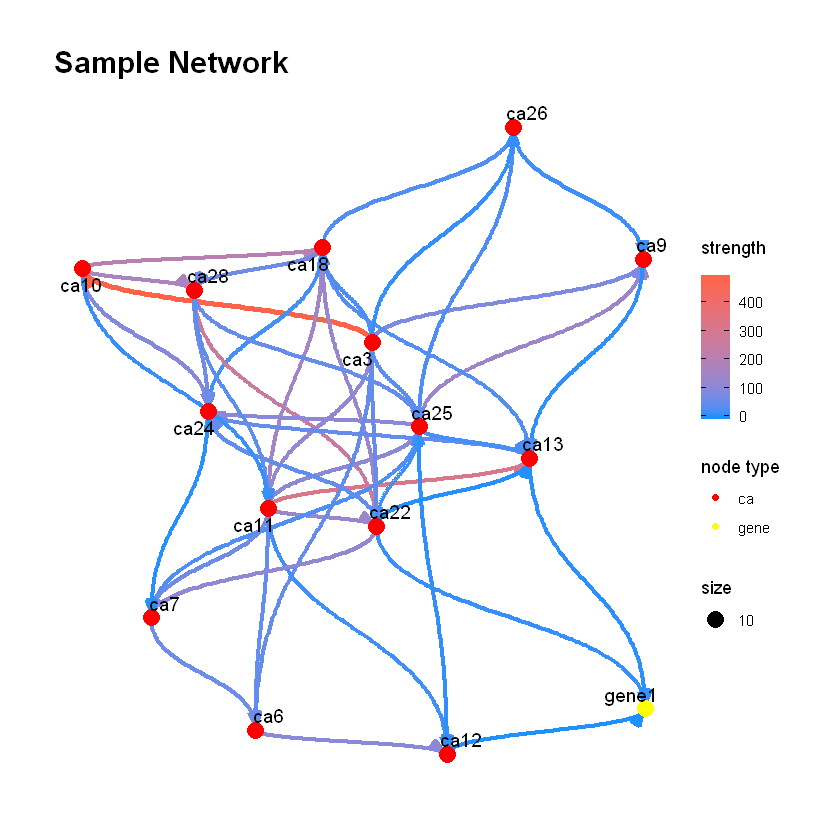

In [3]:
networkPlot(e$strength, title = "Sample Network")

### Path Identification in a Network

In [4]:
pathIdentification(e$strength)

[[1]]
[1] "ca6"  "ca12"

[[2]]
[1] "ca11" "ca12"

[[3]]
[1] "ca25" "ca12"

[[4]]
[1] "ca11" "ca13"

[[5]]
[1] "ca9"  "ca13"

[[6]]
[1] "ca18" "ca13"

[[7]]
[1] "ca25" "ca13"

[[8]]
[1] "ca22" "ca13"

### Count Network Motifs

In [5]:
countMotifs(e$strength)

[1] 192 132 124  48

### Network Comparison

In [6]:
# load graphs
network_0 <- read.csv("./inst/clust_0_strength.csv", header = TRUE, sep = " ")
network_1 <- read.csv("./inst/clust_1_strength.csv", header = TRUE, sep = " ")
network_2 <- read.csv("./inst/clust_2_strength.csv", header = TRUE, sep = " ")
network_3 <- read.csv("./inst/clust_3_strength.csv", header = TRUE, sep = " ")
network_4 <- read.csv("./inst/clust_4_strength.csv", header = TRUE, sep = " ")
network_5 <- read.csv("./inst/clust_5_strength.csv", header = TRUE, sep = " ")
network_6 <- read.csv("./inst/clust_7_strength.csv", header = TRUE, sep = " ")

sample_list <- list("Cluster0" = pathIdentification(network_0),
                    "Cluster1" = pathIdentification(network_1),
                    "Cluster2" = pathIdentification(network_2),
                    "Cluster3" = pathIdentification(network_3),
                    "Cluster4" = pathIdentification(network_4),
                    "Cluster5" = pathIdentification(network_5),
                    "Cluster7" = pathIdentification(network_6)
                   )
mat <- pathConsistency(sample_list)
mat

Cluster0,Cluster1,Cluster2,Cluster3,Cluster4,Cluster5,Cluster7
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.16666667,0.0000000,0.04166667,0.0000000,0.00000000,0.00000000,0.04166667
0.00000000,0.2083333,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000
0.04166667,0.0000000,0.20833333,0.0000000,0.00000000,0.00000000,0.08333333
0.00000000,0.0000000,0.00000000,0.1666667,0.00000000,0.00000000,0.00000000
0.00000000,0.0000000,0.00000000,0.0000000,0.04166667,0.00000000,0.00000000
0.00000000,0.0000000,0.00000000,0.0000000,0.00000000,0.20833333,0.04166667
0.04166667,0.0000000,0.08333333,0.0000000,0.00000000,0.04166667,0.16666667


In [7]:
library(reshape)
rownames(mat) <- colnames(mat)
df <- melt(as.matrix(mat))
head(df)

,X1,X2,value
,<fct>,<fct>,<dbl>
1,Cluster0,Cluster0,0.16666667
2,Cluster1,Cluster0,0.00000000
3,Cluster2,Cluster0,0.04166667
4,Cluster3,Cluster0,0.00000000
5,Cluster4,Cluster0,0.00000000
6,Cluster5,Cluster0,0.00000000


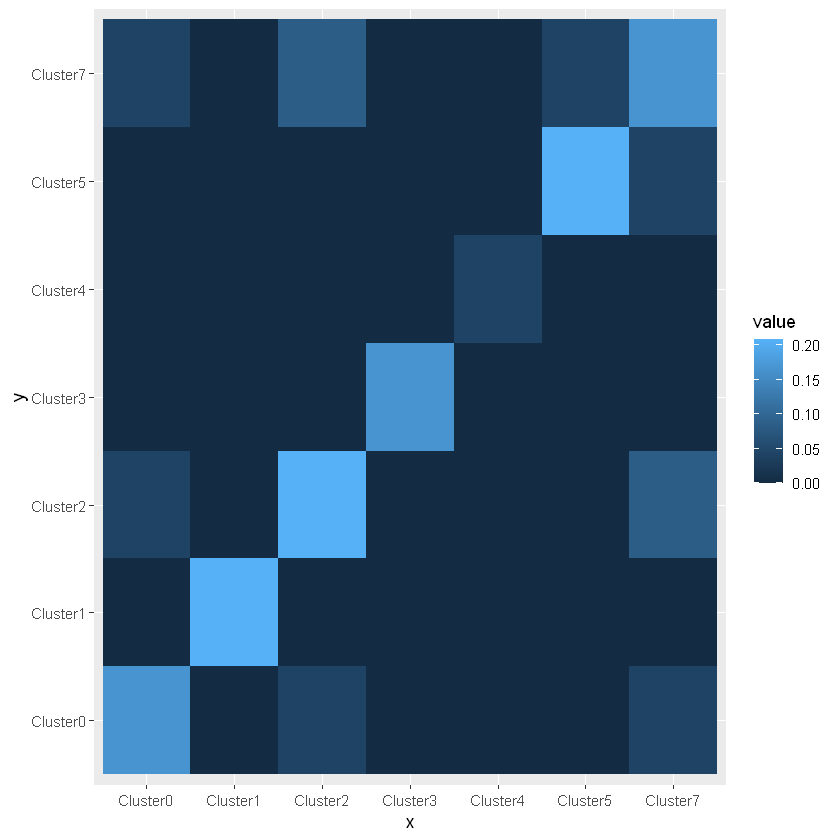

In [8]:
library(ggplot2)
colnames(df) <- c("x", "y", "value")
ggplot(df, aes(x = x, y = y, fill = value)) + geom_tile()